<span style="color:black;font-weight:700;font-size:32px"> 
               Построение моделей машинного обучения для фермерского хозяйства "Вольный луг" 
</span>

<span style="color:black;font-weight:700;font-size:22px"> 
              Описание данных 
</span>

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание таблицы:\

*Параметры корма коровы*\
ЭКЕ (Энергетическая кормовая единица) — измерение питательности корма коровы;\
Сырой протеин — содержание сырого протеина в корме, в граммах;\
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.\

*Где паслась корова*\
Тип пастбища — ландшафт лугов, на которых паслась корова.\
Особенности коровы\
id — номер коровы;\
Порода — порода коровы;\
Возраст — бинарный признак (менее_2_лет, более_2_лет);\
Имя Папы — порода папы коровы.\

*Характеристики молока*:\
Жирность — содержание жиров в молоке, в процентах;\
Белок — содержание белков в молоке, в процентах;\
Вкус молока — оценка вкуса по личным критериям фермера;\
Удой — масса молока, которую корова даёт в год, в килограммах.\

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.\

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Структура таблицы почти аналогична ferma_main.csv, кроме нескольких особенностей:\

Белок и Жирность молока указаны на момент покупки — когда «ЭкоФерма» давала им свой корм.

Параметры кормления ЭКЕ, Сырой протеин, СПО отсутствуют. Недавно технологи заказчика пересмотрели параметры корма и планируют их внедрить после расширения стада. Именно новые параметры нужно использовать, когда вы будете применять предсказательные модели к бурёнкам «ЭкоФермы». 

По новой схеме фермер планирует увеличить средние значения ЭКЕ, Сырой протеин, СПО на 5%.
Удой и Вкус молока неизвестны — именно их и предстоит предсказать!

<span style="color:black;font-weight:700;font-size:22px"> 
              План работы
</span>

**1. Загрузка и изучение данных**- изучение данных и основных признаков.\

**2. Предобработка данных** - обработка пропусков, дубликатов(явных, неявных), преобразование типов, обработка выбросов и фильтрация данных.\

**3. Ислледовательский анализ данных**- 
- статистический анализ всех признаков
- построение графиков по каждому признаку
- вывод о данных\

**4. Коррелляционный анализ**- 
- Изучите взаимосвязь между целевым и входными признаками. Если данные ненормально распределены, используйте коэффициент корреляции Спирмена или Кендалла. Если нормально — коэффициент корреляции Пирсона. Учитывайте, что корреляционные связи в подгруппах могут различаться.
- Визуализируйте корреляции с помощью диаграмм рассеяния scatterplot.
- Сделайте выводы о взаимосвязи целевого признака с остальными факторами. Ответьте на вопросы:
1) Какой тип взаимосвязи между ними?
2) Есть ли нелинейные связи между признаками?
3) Нужно ли вводить в модель дополнительные факторы, чтобы это учесть?
4) Наблюдается ли мультиколлинеарность между признаками?

**5.Обучение модели линейной регрессии**- 
1) Построение модели линейной регресии с данными из датасета ferma_main.csvс целевым признаком Удой.
2) Построение модели линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком.
3) Построение модели линейной регрессии с учётом нового признака из файла ferma_dad.csv. Учтите преобразование нелинейности в пункте 2.
4) Сравнение качества трёх моделей линейной регрессии, сопоставьте их R² и остатки.
5) Рассчитайте точность каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрики.
    По метрикам определите, какая из моделей точнее.
    Определите доверительный интервал прогноза лучшей модели.
6) Применитm лучшую по качеству и по точности модель к данным из датасета cow_buy.csv и спрогнозируйте удой коров, которых фермер хочет купить.\
    Нормализовать данные перед прогнозом. Примените One-Hot Encoding и StandardScaler к тем же признакам, которые вы  нормализовывали в датасете ferma_main.csv.\
    Получите прогноз удоя коров.
    
**6. Обучение модели логистической регрессии**-\
1) Постройте модель логистической регрессии на данных датасета farm_main.csv.\ 
    **Используйте в качестве целевого признак Вкус молока**.
    
2)  Проанализируйте модель логистической регрессии.

3) Примените модель логистической регрессии к датасету cow_buy.csv. Классифицируйте коров, которых хочет купить фермер, по вкусу молока, который они будут давать.

**7. Выводы**\

- Выведите прогнозы вкуса молока и удоя коров «ЭкоФермы» в одной таблице DataFrame.
- Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.
- Коротко опишите результаты работы модели для фермера. Ответьте на вопросы:
- Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
- Какие ещё рекомендации можно ему дать?
- Сделайте выводы о моделях линейной регрессии и логистической регрессии. Ответьте на вопросы:
- Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
- Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
- Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

# Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
from numpy import float64
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
try:
    ferma_df = pd.read_csv('/datasets/ferma_main.csv',sep=';')
except:
    ferma_df = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';',  index_col='id')

In [3]:
try:
    ferma_dad_df = pd.read_csv('/datasets/ferma_dad.csv',sep=';')
except:
    ferma_dad_df = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv',sep=';',  index_col='id')

In [4]:
try:
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv',sep=';')
except:
    cow_buy_df = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv',sep=';')

In [5]:
ferma_df.head(10)

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
id,,,,,,,,,,,
1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет


In [6]:
ferma_df.shape


(634, 11)

In [7]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 1 to 627
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Удой, кг                               634 non-null    int64 
 1   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 2   Сырой протеин, г                       634 non-null    int64 
 3   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 4   Порода                                 634 non-null    object
 5   Тип пастбища                           634 non-null    object
 6   порода папы_быка                       634 non-null    object
 7   Жирность,%                             634 non-null    object
 8   Белок,%                                634 non-null    object
 9   Вкус молока                            634 non-null    object
 10  Возраст                                634 non-null    object
dtypes: int64(2), object

In [8]:
ferma_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
id,,,,,,,,,,,
1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [9]:
ferma_dad_df.head(10)

,Имя Папы
id,
1,Буйный
2,Соловчик
3,Барин
4,Буйный
5,Барин
6,Барин
7,Соловчик
8,Геркулес
9,Буйный


In [10]:
ferma_dad_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 1 to 629
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Имя Папы  629 non-null    object
dtypes: object(1)
memory usage: 9.8+ KB


In [11]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [12]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [13]:
cow_buy_df.shape

(20, 7)

In [14]:
cow_buy_df

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Датасет ferma_df из файла ferma_main.csv содержит 634 записи и 12 признаков. В данном датасет отсутсвуют пропуски в данных, но для некоторых признаков необходимо преобразовать типы данных.

Датасет ferma_dad_df из файла ferma_dad.csv содержит в себе 629 записей и 2 признака. В данном датасет отсутсвуют пропуски в данных, но для некоторых признаков необходимо преобразовать типы данных.

Датасет cow_buy_df содержит в себе 20 записей и 6 признаков.В данном датасет отсутсвуют пропуски в данных, но для некоторых признаков необходимо преобразовать типы данных.



# Предобработка данных

## Обработаем датасет ferma_df

In [15]:
ferma_df.isna().sum()

Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [16]:
ferma_df.duplicated().sum()

5

In [17]:
duplicates = ferma_df[ferma_df.duplicated()]

In [18]:
duplicates

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
id,,,,,,,,,,,
627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


In [19]:
ferma_df = ferma_df.drop_duplicates()

In [20]:
ferma_df.duplicated().sum()

0

Обработаем неявные дубликаты в столбце Тип пастбища.

In [21]:
ferma_df['Тип пастбища'] = ferma_df['Тип пастбища'].replace('Равнинные', 'Равнинное')
ferma_df['порода папы_быка'] = ferma_df['порода папы_быка'].replace('Айдиалл', 'Айдиал')


Обработал дубликаты в датасете ferma_df

In [22]:
ferma_df.dtypes

Удой, кг                                  int64
ЭКЕ (Энергетическая кормовая единица)    object
Сырой протеин, г                          int64
СПО (Сахаро-протеиновое соотношение)     object
Порода                                   object
Тип пастбища                             object
порода папы_быка                         object
Жирность,%                               object
Белок,%                                  object
Вкус молока                              object
Возраст                                  object
dtype: object

In [23]:
convert_columns_to_float = ['ЭКЕ (Энергетическая кормовая единица)', 'СПО (Сахаро-протеиновое соотношение)','Жирность,%',
                   'Белок,%']

for column in convert_columns_to_float:
    ferma_df[column] = ferma_df[column].apply(lambda x: float(x.replace(',', '.')))    

In [24]:
ferma_df.dtypes

Удой, кг                                   int64
ЭКЕ (Энергетическая кормовая единица)    float64
Сырой протеин, г                           int64
СПО (Сахаро-протеиновое соотношение)     float64
Порода                                    object
Тип пастбища                              object
порода папы_быка                          object
Жирность,%                               float64
Белок,%                                  float64
Вкус молока                               object
Возраст                                   object
dtype: object

Преобоазовал типы данных для числовых столбцов с типа object на float.


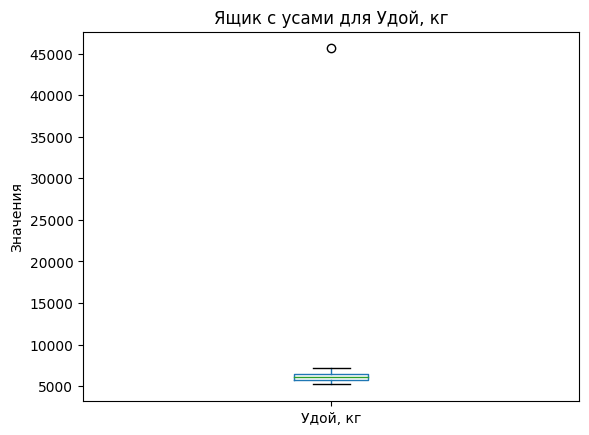

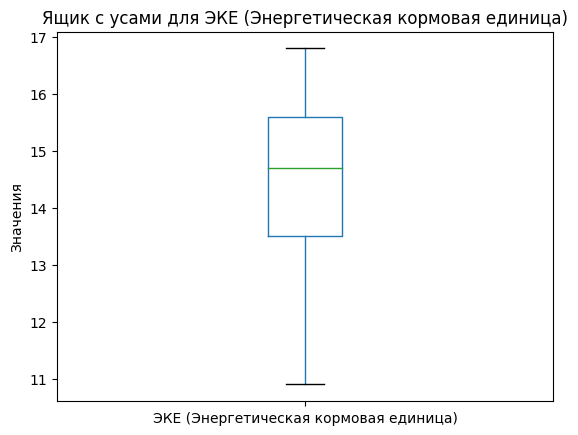

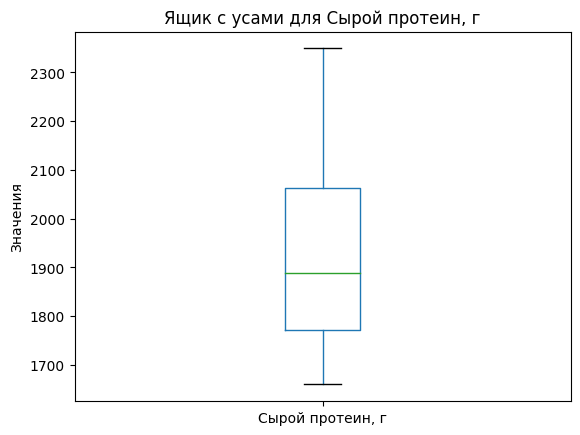

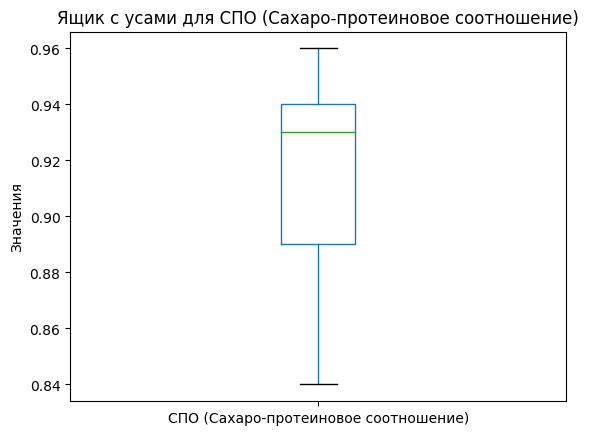

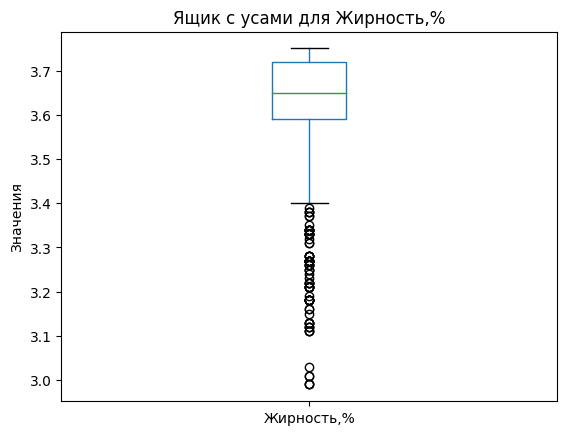

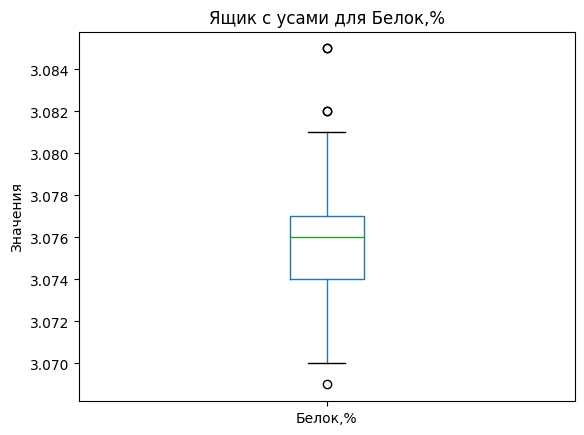

In [25]:
numeric_columns = ferma_df.select_dtypes(include=['number'])

for column in numeric_columns.columns:
    plt.figure() 
    numeric_columns.boxplot(column=column)
    plt.title(f'Ящик с усами для {column}')
    plt.ylabel('Значения')
    plt.grid(False)

# Отображаем все графики
plt.show()

В столбце "Удой" явно видны аномальные значения, обработаем их.

In [26]:
ferma_df.describe()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


<Axes: >

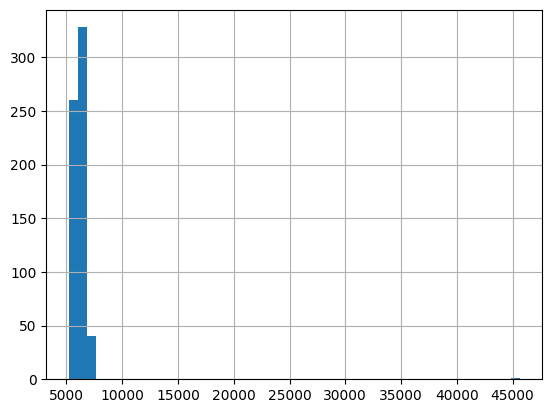

In [27]:
ferma_df['Удой, кг'].hist(bins=50)

Обработаем столбец "Удой, кг" и отфильтруем значения сверху 0.97 перцентиля

In [28]:
threshold = ferma_df['Удой, кг'].quantile(0.99)
ferma_df = ferma_df[ferma_df['Удой, кг'] <= threshold]

<Axes: >

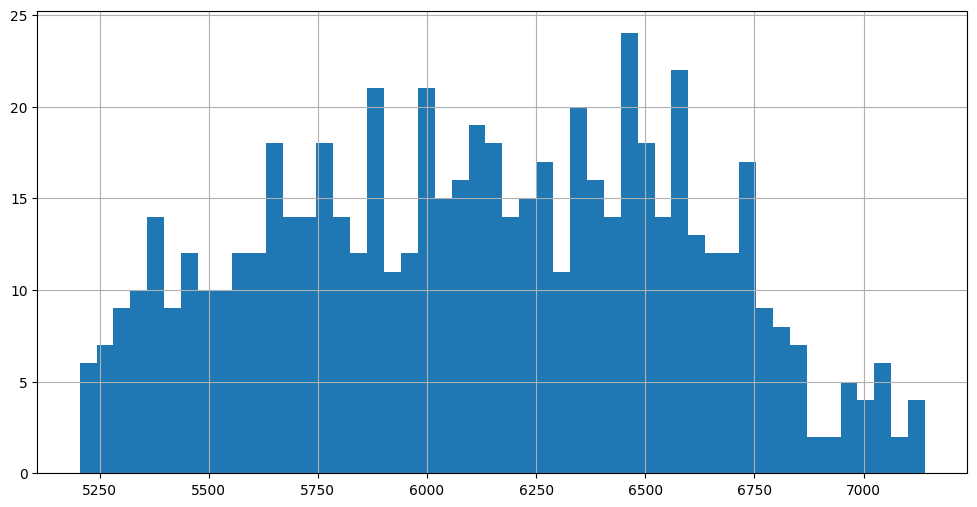

In [29]:
ferma_df['Удой, кг'].hist(bins=50, figsize=(12,6))

In [30]:
ferma_df.shape


(622, 11)

По гистограмме видно, что выбросы обработаны.


## Обработаем датасет ferma_dad_df

In [31]:
ferma_dad_df.isna().sum()

Имя Папы    0
dtype: int64

In [32]:
ferma_dad_df.duplicated().sum()

625

In [33]:
ferma_dad_df.dtypes

Имя Папы    object
dtype: object

In [34]:
ferma_dad_df.shape

(629, 1)

В датасете ferma_dad_df не содержится выбросов, дубликатов и пустых значений.

## Обработаем датасет cow_buy_df

In [35]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [36]:
cow_buy_df.isna().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

In [37]:
cow_buy_df.dtypes

Порода                     object
Тип пастбища               object
порода папы_быка           object
Имя_папы                   object
Текущая_жирность,%         object
Текущий_уровень_белок,%    object
Возраст                    object
dtype: object

In [38]:
cow_buy_df.shape

(20, 7)

**обработка и типизация датасетов**

После обработки ferma_df и ferma_dad_df объеденим эти два датасета.



In [39]:
ferma_df = ferma_df.merge(ferma_dad_df, on='id')

In [40]:
ferma_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [41]:
ferma_df.shape

(622, 12)

In [42]:
ferma_df.isna().sum()

Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
Имя Папы                                 0
dtype: int64

In [43]:
ferma_df.duplicated().sum()

0

In [44]:
ferma_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [45]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [46]:
cow_buy_df['Тип пастбища'] = cow_buy_df['Тип пастбища'].str.title()
cow_buy_df = cow_buy_df.rename(columns = {'Имя_папы': 'Имя Папы', 
                                          'Текущая_жирность,%':'Жирность,%', 
                                          'Текущий_уровень_белок,%':'Белок,%'})

In [47]:
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя Папы,"Жирность,%","Белок,%",Возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [48]:
convert_columns_to_float = ['Жирность,%','Белок,%']

for column in convert_columns_to_float:
    cow_buy_df[column] = cow_buy_df[column].apply(lambda x: float(x.replace(',', '.')))   

**Параметры кормления ЭКЕ, Сырой протеин, СПО отсутствуют. Недавно технологи заказчика пересмотрели параметры корма и планируют их внедрить после расширения стада. Именно новые параметры нужно использовать, когда вы будете применять предсказательные модели к бурёнкам «ЭкоФермы». По новой схеме фермер планирует увеличить средние значения ЭКЕ, Сырой протеин, СПО на 5%.**

Добавим эти столбцы.

In [49]:
cow_buy_df['ЭКЕ (Энергетическая кормовая единица)'] = round((ferma_df['ЭКЕ (Энергетическая кормовая единица)'].mean()) * 1.05, 2)
cow_buy_df['Сырой протеин, г'] = round((ferma_df['Сырой протеин, г'].mean()) * 1.05, 2)
cow_buy_df['СПО (Сахаро-протеиновое соотношение)'] = round((ferma_df['СПО (Сахаро-протеиновое соотношение)'].mean()) * 1.05, 2)
cow_buy_df.head()

,Порода,Тип пастбища,порода папы_быка,Имя Папы,"Жирность,%","Белок,%",Возраст,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение)
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.26,2017.01,0.96
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.26,2017.01,0.96
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.26,2017.01,0.96
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.26,2017.01,0.96
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.26,2017.01,0.96


Упорядочим столбцы 

In [50]:
desired_order_col = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
                    'Порода', 'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%','Возраст', 'Имя Папы']
cow_buy_df = cow_buy_df[desired_order_col]
cow_buy_df.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы
0,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес
1,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,Буйный
2,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,Барин
3,15.26,2017.01,0.96,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,Буйный
4,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,Буйный


In [51]:
ferma_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


Типизировали все значения в столбцах для датасетов ferma_df и cow_buy_df

В объединенном датасете остутствуют пропуски и дубликаты.

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

В ходе предобработки данных были обработаны три датасета ferma_df, ferma_dad_df, cow_buy_df.

В датасете  ferma_df были преобразованы типы числовых столбцов с типа object на float, отфильтрованы аномальные значения столбца "Удой, кг", а также обработаны дубликаты в строках.

Датасет ferma_dad_df не требовал обработки так как не содержит дубликатов, выбросов и аномалий.

В датасете  cow_buy_df были преобразованы типы числовых столбцов с типа object на float, а также обработаны дубликаты в строках.

Также были типизированы данные для датасетов ferma_df и cow_buy_df для удобвства построения моделей МО.

# Исследовательский анализ данных

## Анализ ferma_df

In [52]:
ferma_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [53]:
ferma_df.describe()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,6115.649518,14.531190,1920.963023,0.912781,3.603215,3.075677
std,466.328807,1.294815,181.225414,0.032219,0.168557,0.002556
min,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,5746.000000,13.500000,1769.500000,0.890000,3.590000,3.074000
50%,6129.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,6496.500000,15.600000,2052.500000,0.940000,3.720000,3.077000
max,7141.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


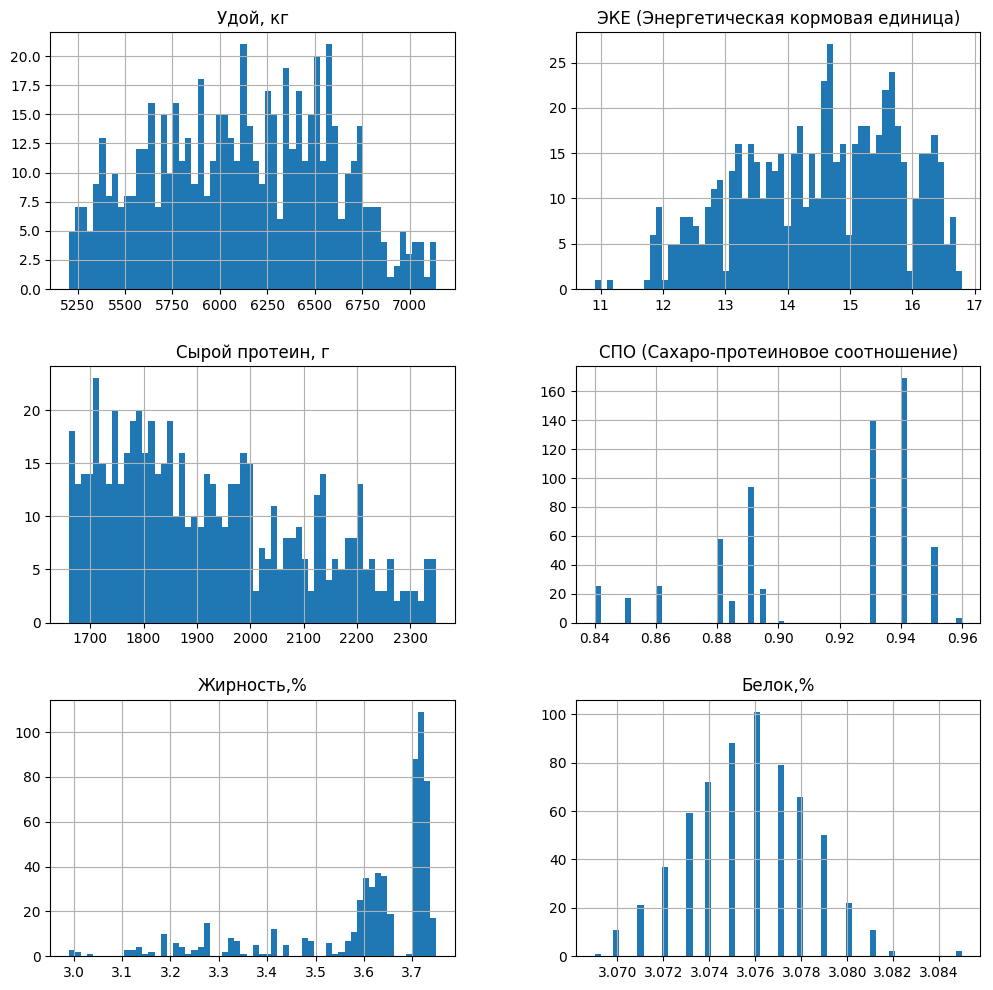

In [54]:
ferma_df.hist(bins=60, figsize=(12,12));

- Признак Удой, кг распределен в пределах [5204, 7141], данные распрделены по нормальноему закону.Соеднее значение - 6115.64.
- Признак ЭКЕ() Энергетическая кормовая единица распределен в пределах [10.9, 16.8], данные распределены примерно по нормальному закону со средним значением - 14.53.
- Признак Сырой протеин распределен в пределах [1660, 2349],  данные распределены примерно по нормальному закону со средним значением - 1920.9630
- Признак СПО имеет среднее значение - 0.912781

- Признак Жирность,% распределен в пределах [3.07, 3.75]. Значение в пределах 3.7% самые популярные, среднее значение столбца- 3.603215
- Признак Белок,% имеет среднее значение - 3.075677

In [55]:
def plot_pie_for_feature(df, column):
    fig, ax = plt.subplots(figsize=(12,6))
    colors=['lightgreen', 'yellow', 'red', 'skyblue', 'orange']
    column_values_counts = df[column].value_counts()
    column_values_counts.plot(kind='pie', ax = ax, colors= colors, autopct='%1.1f%%')
    plt.title(column)    

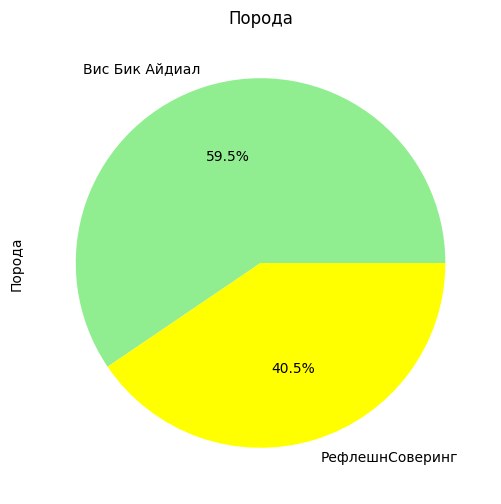

In [56]:
plot_pie_for_feature(ferma_df, 'Порода')

Порода Вис Бик Айдиал встречается в 59,5% случаев, РефлешнСоверинг - 40,5%.

In [57]:
ferma_df['Тип пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [58]:
# type_past_counts = ferma_df['Тип пастбища'].value_counts()

# fig, ax = plt.subplots(figsize=(12,6))
# type_past_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')


# for i,v in enumerate(type_past_counts):
#     ax.text(i, v + 1, str(v),ha='center', va='bottom', fontsize=7)

# plt.title('Распределение типа пастбища')
# plt.xlabel('Тип холма')
# plt.ylabel('Количество')
# None

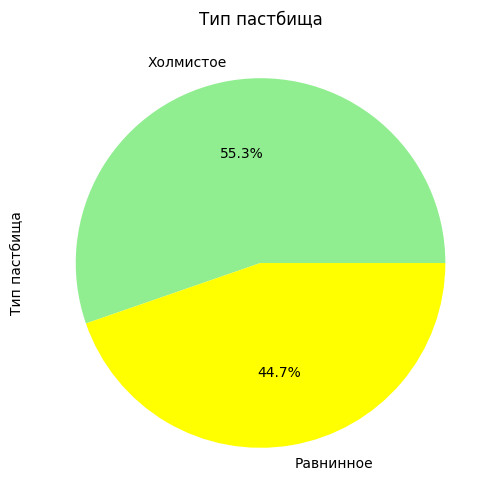

In [59]:
plot_pie_for_feature(ferma_df, 'Тип пастбища')

Как можно заметить чаще коровы пасутся на холмистых пастбищах - 344, на равнине реже - 278.

In [60]:
ferma_df['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

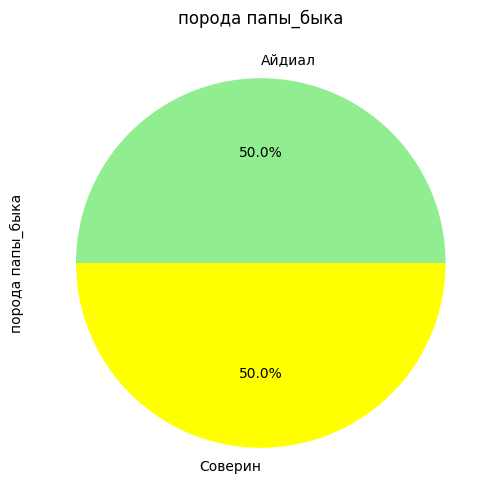

In [61]:
plot_pie_for_feature(ferma_df, 'порода папы_быка')

Породы отцов быков, распрелелены одинаково по выборке.

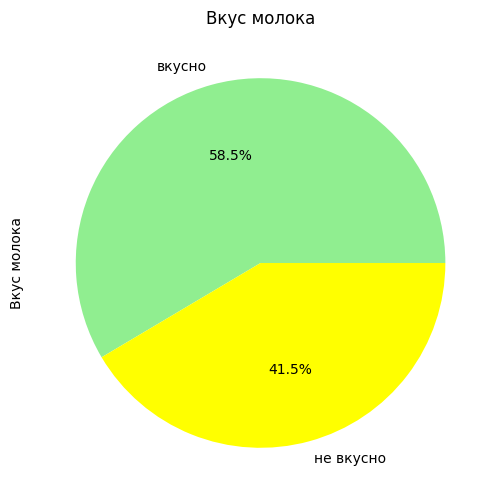

In [62]:
plot_pie_for_feature(ferma_df, 'Вкус молока')

В 58.5% случаях молоко является вкусным, в 41.5% - нет.

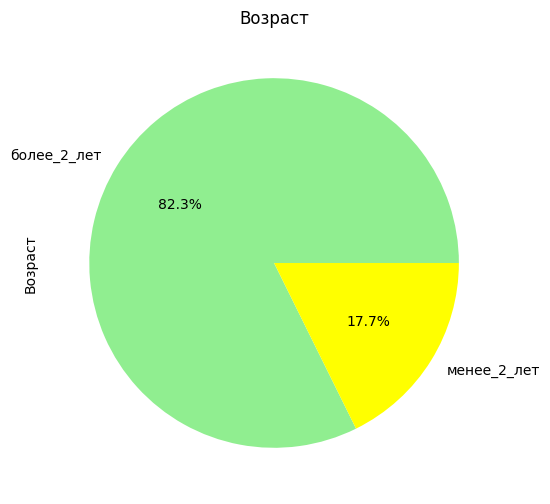

In [63]:
plot_pie_for_feature(ferma_df,'Возраст')

На ферме 82.3%  коров старше 2 лет, 17.7% - нет.

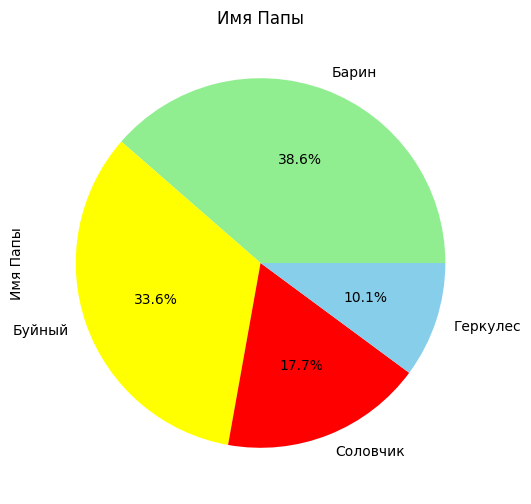

In [64]:
plot_pie_for_feature(ferma_df, 'Имя Папы')

Самый распространненый отец у поголовья коров на ферме - Барин(38.6%), далее идут Буйный(33.6%), Соловчик(38.6%) и самый редкий случай - Геркулес(10.1%) 

Построим сводные таблицы, которые будут характеризовать признаки - Удой и Вкус молока.

In [65]:
ferma_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [66]:
ferma_df.pivot_table(index=['Порода', 'Возраст', 'Тип пастбища'], 
                     values=['Удой, кг', 'Жирность,%', 'Белок,%', 'Вкус молока'],
                     aggfunc={'Удой, кг': np.median,
                              'Жирность,%': np.median,
                              'Белок,%': np.median,
                              })

Белок,%  Жирность,%  Удой, кг
Порода          Возраст     Тип пастбища                               
Вис Бик Айдиал  более_2_лет Равнинное      3.0760       3.710    6232.0
                            Холмистое      3.0760       3.650    6238.0
                менее_2_лет Равнинное      3.0760       3.460    5492.5
                            Холмистое      3.0760       3.420    5415.5
РефлешнСоверинг более_2_лет Равнинное      3.0740       3.720    6331.0
                            Холмистое      3.0750       3.710    6303.0
                менее_2_лет Равнинное      3.0740       3.300    5378.0
                            Холмистое      3.0755       3.425    5381.5

Как можно заметить Удой как правило выше у коров, чей возраст больше 2 лет. В целом большой разницы в удое коровы разных пород не наблюдается.

In [67]:
pivot_table = ferma_df.pivot_table(index=['Вкус молока', 'Порода'],values=['Возраст'], aggfunc='count').rename(columns={'Возраст': 'Количество'})
pivot_table

Количество
Вкус молока Порода                     
вкусно      Вис Бик Айдиал          216
            РефлешнСоверинг         148
не вкусно   Вис Бик Айдиал          154
            РефлешнСоверинг         104

In [68]:
pivot_table

Количество
Вкус молока Порода                     
вкусно      Вис Бик Айдиал          216
            РефлешнСоверинг         148
не вкусно   Вис Бик Айдиал          154
            РефлешнСоверинг         104

In [69]:
pivot_table_reset = pivot_table.reset_index()

sum_by_poroda = pivot_table_reset.groupby('Порода')['Количество'].sum()

pivot_table_reset = pivot_table_reset.merge(sum_by_poroda, on='Порода', suffixes=('', '_sum'))

pivot_table_reset['Процент от общего числа'] = (pivot_table_reset['Количество'] / pivot_table_reset['Количество_sum']) * 100

pivot_table_reset.drop(columns=['Количество_sum'], inplace=True)

pivot_table_reset

,Вкус молока,Порода,Количество,Процент от общего числа
0,вкусно,Вис Бик Айдиал,216,58.378378
1,не вкусно,Вис Бик Айдиал,154,41.621622
2,вкусно,РефлешнСоверинг,148,58.730159
3,не вкусно,РефлешнСоверинг,104,41.269841


Как можно заметить, породы имеет почти одинаковое соотношение вкусного/ невкусного молока.

In [70]:
pivot_table_type_past = ferma_df.pivot_table(index=['Вкус молока', 'Тип пастбища'],
                     values=['Возраст'], 
                     aggfunc={'Возраст': 'count'})\
                                .rename(columns={'Возраст': 'Количество'})
pivot_table_type_past

Количество
Вкус молока Тип пастбища            
вкусно      Равнинное            136
            Холмистое            228
не вкусно   Равнинное            142
            Холмистое            116

In [71]:
pivot_table_type_past_reset = pivot_table_type_past.reset_index()

sum_by_type_past = pivot_table_type_past_reset.groupby('Тип пастбища')['Количество'].sum()

pivot_table_type_past_reset = pivot_table_type_past_reset.merge(sum_by_type_past, on='Тип пастбища', suffixes=('', '_sum'))

pivot_table_type_past_reset['Процент от общего числа'] = (pivot_table_type_past_reset['Количество']\
                                                          / pivot_table_type_past_reset['Количество_sum']) * 100

pivot_table_type_past_reset.drop(columns=['Количество_sum'], inplace=True)

pivot_table_type_past_reset

,Вкус молока,Тип пастбища,Количество,Процент от общего числа
0,вкусно,Равнинное,136,48.920863
1,не вкусно,Равнинное,142,51.079137
2,вкусно,Холмистое,228,66.279070
3,не вкусно,Холмистое,116,33.720930


Как можно заметить, коровы которые пасутся на холмистой местности имеет больший процент вкусного молока, чем на равнине.

## Анализ cow_buy_df

In [72]:
cow_buy_df.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы
0,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес
1,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,Буйный
2,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,Барин
3,15.26,2017.01,0.96,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,Буйный
4,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,Буйный


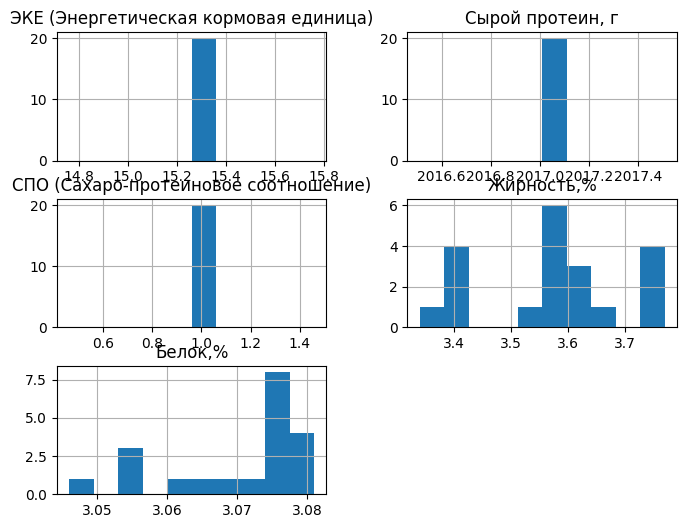

In [73]:
cow_buy_df.hist(bins=10, figsize=(8,6), grid=True);
    

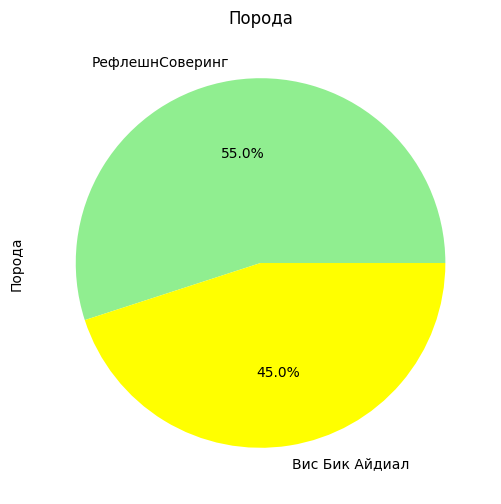

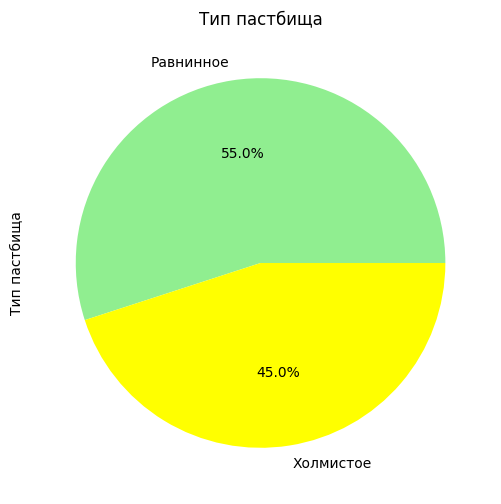

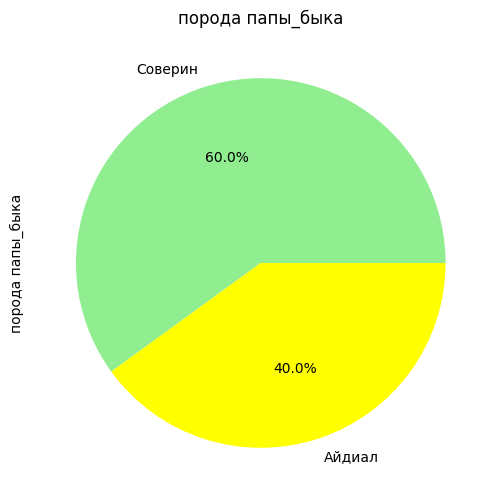

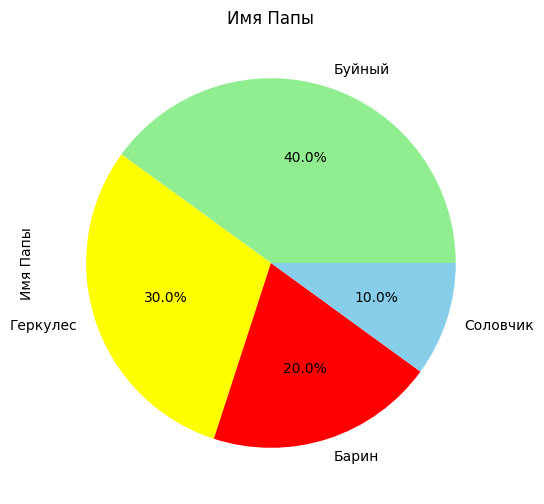

In [74]:
columns_to_plot = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя Папы']

for column in columns_to_plot:
    plot_pie_for_feature(cow_buy_df, column)

Среди коров на покупку примерно одинаковое распределение по породам РефлешнСоверинг (52.6%), Вис Бик Айдиал (47.4%),\
По типу пастбища - холмистое (47.4%), равнинное (52.6%)\
Порода папы быка - Соверин (57.9%), Айдиал (42.1%)


<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Для датасета ferma_df

- Признак Удой, кг распределен в пределах [5204, 7141], данные распрделены по нормальноему закону.Соеднее значение - 6115.64.
- Признак ЭКЕ() Энергетическая кормовая единица распределен в пределах [10.9, 16.8], данные распределены примерно по нормальному закону со средним значением - 14.53.
- Признак Сырой протеин распределен в пределах [1660, 2349],  данные распределены примерно по нормальному закону со средним значением - 1920.9630
- Признак СПО имеет среднее значение - 0.912781

- Признак Жирность,% распределен в пределах [3.07, 3.75]. Значение в пределах 3.7% самые популярные, среднее значение столбца- 3.603215
- Признак Белок,% имеет среднее значение - 3.075677

- Порода Вис Бик Айдиал встречается в 59,5% случаев, РефлешнСоверинг - 40,5%.
- Как можно заметить чаще коровы пасутся на холмистых пастбищах - 344, на равнине реже - 278.
- Породы отцов быков, распрелелены одинаково по выборке.
- В 58.5% случаях молоко является вкусным, в 41.5% - нет.
- На ферме 82.3% коров старше 2 лет, 17.7% - нет.
- Самый распространненый отец у поголовья коров на ферме - Барин(38.6%), далее идут Буйный(33.6%), Соловчик(38.6%) и самый редкий случай - Геркулес(10.1%)


Как можно заметить Удой как правило выше у коров, чей возраст больше 2 лет. В целом большой разницы в удое коровы разных пород не наблюдается. Также можно сказать породы имеет почти одинаковое соотношение вкусного/ невкусного молока и то, что коровы которые пасутся на холмистой местности имеет больший процент вкусного молока, чем на равнине.

# Корреляционный анализ

Проведем корреляционный анализ датасета  ferma_df

C:\Users\Иван\AppData\Local\Temp\ipykernel_23572\1083679224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=ferma_df.corr(), annot=True)


<Axes: >

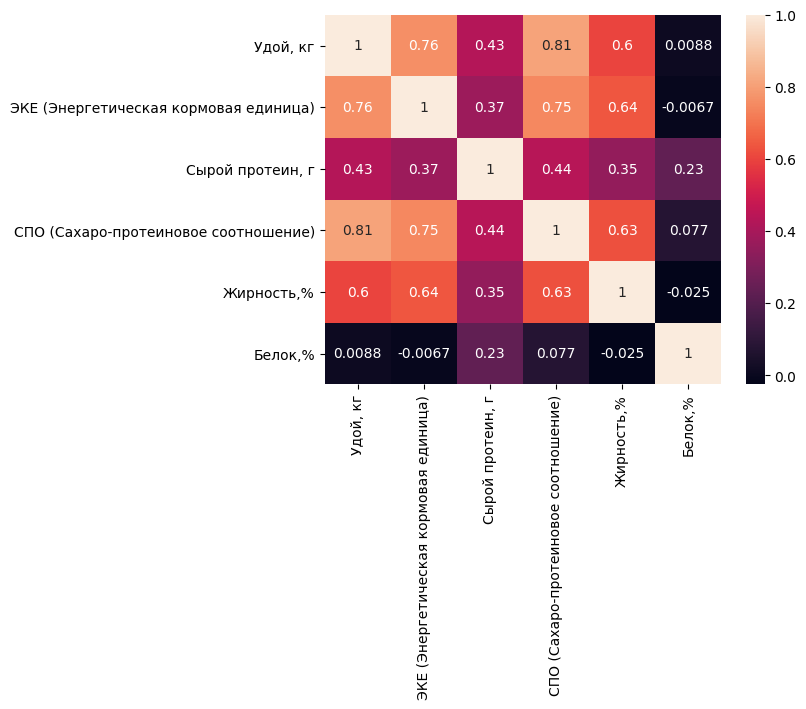

In [75]:
sns.heatmap(data=ferma_df.corr(), annot=True)

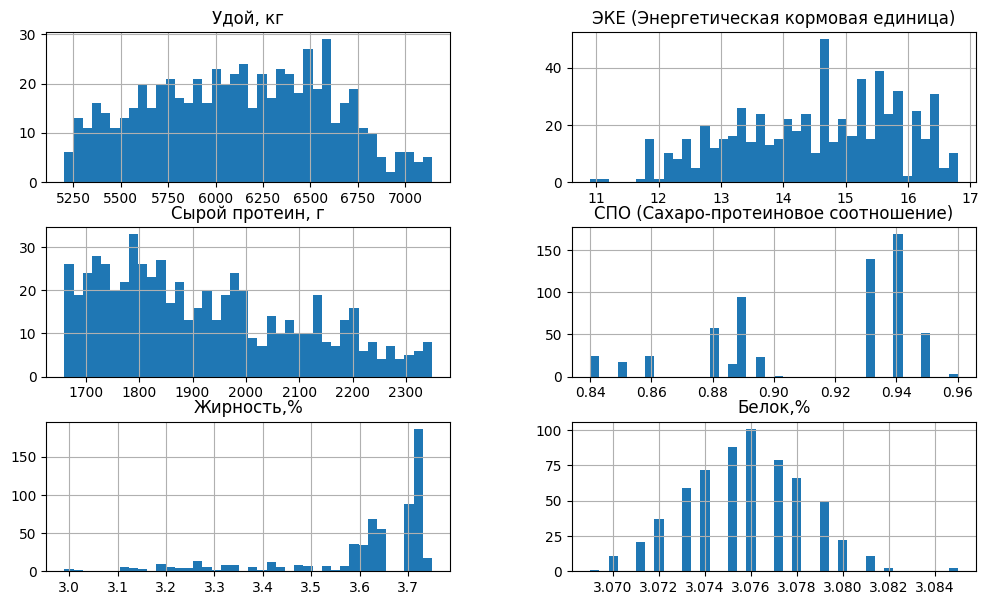

In [76]:
ferma_df.hist(bins=40, figsize=(12,7));

In [77]:
not_normal_distr_col = ['Удой, кг', 'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']
normal_distr_col = ['Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г']

Для нормально распределенных признаков используем коэффициент корреляции Пирсона, для ненормально распределенных величин используем коэффициент корреляции Спирмена.

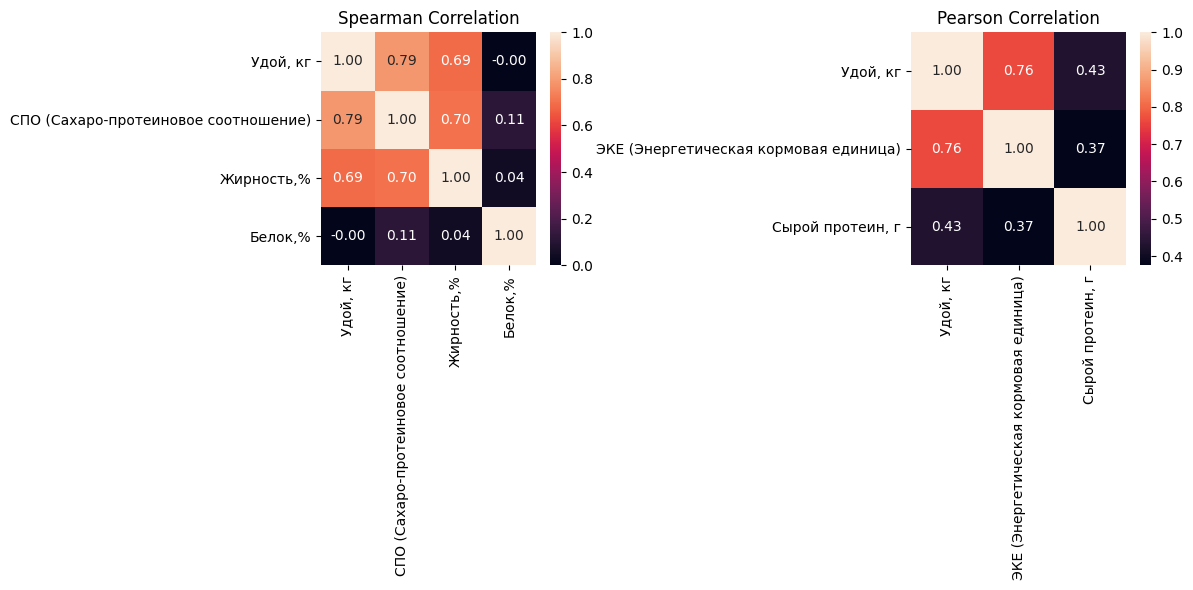

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(ferma_df[not_normal_distr_col].corr(method='spearman'), annot=True, fmt='.2f', ax=axes[0])
axes[0].set_title('Spearman Correlation')
sns.heatmap(ferma_df[normal_distr_col].corr(method='pearson'), annot=True, fmt='.2f', ax=axes[1])
axes[1].set_title('Pearson Correlation')
plt.tight_layout()
plt.show()

Как можно заметить, целевой признак Удой, кг имеет высокую положительную коррелляцию со следующими признаками:
- 'СПО (Сахаро-протеиновое соотношение)' - 0.79
- 'Жирность,%' - 0.69
- 'ЭКЕ (Энергетическая кормовая единица)' - 0.76
- 'Сырой протеин, г' - 0.43

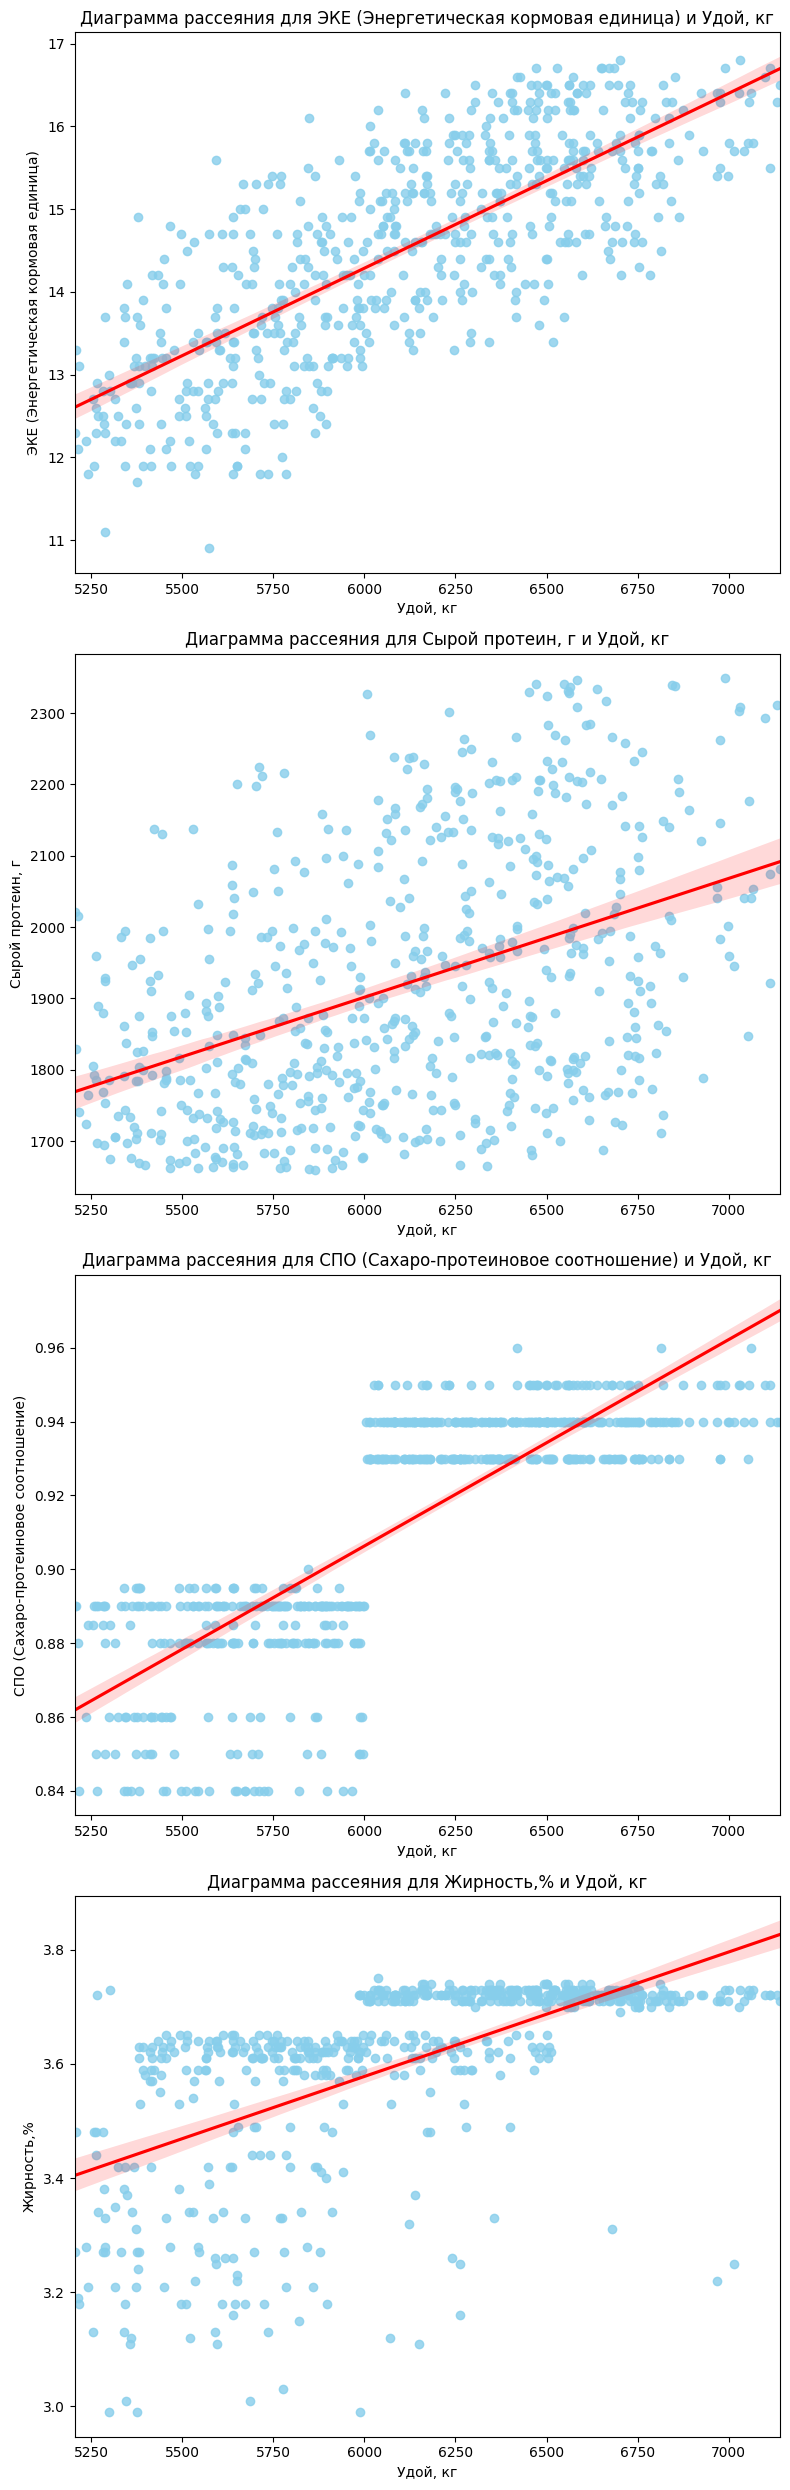

In [79]:
col_to_plot_scatter = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
                       'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%']

# Создаем подграфики для каждого столбца
fig, axes = plt.subplots(len(col_to_plot_scatter), 1, figsize=(8, 25))
sns.set_palette("deep")
# Итерируемся по столбцам и строим графики
for i, col in enumerate(col_to_plot_scatter):
    sns.set_palette("pastel")
    sns.regplot(x='Удой, кг', y=col, data=ferma_df, ax=axes[i],  
                line_kws={"color": 'red'}, scatter_kws={"color": 'skyblue'})
    axes[i].set_xlabel('Удой, кг')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Диаграмма рассеяния для {col} и Удой, кг')

plt.tight_layout()
plt.show()

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

Как можно заметить, целевой признак Удой, кг имеет высокую положительную коррелляцию со следующими признаками:

'СПО (Сахаро-протеиновое соотношение)' - 0.79
'Жирность,%' - 0.69
'ЭКЕ (Энергетическая кормовая единица)' - 0.76
'Сырой протеин, г' - 0.43

Между данными признаками и целевым признаком наблюдаются сильная линейная зависимость, и их можно учитывать для построения модели линейной регрессии, но так как нецелесообразно предсказывать удой коровы по параметрам молока, поэтому для модели регрессии будем использовать параметры корма, среди которых-  'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)', но так как ЭКЕ И СПО имеют между собой высокий коэффициент корреляции и дабы избежать мультиколлинеарности уберем признак СПО (так как СПО связа)

# Обучение модели линейной регрессии

## Первая модель линейной регрессии

In [80]:
ferma_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


Обучим модель линейной регрессии, в качестве целевого признака используем "Удой, кг", в качестве входных признаков возьмем из числовых СПО(Сахарно-протеиновое соотношение) и Сырой протеин, г и ЭКЕ (Энергетическая кормовая единица). Из категориальных признаков возьмем те, которые связаны с физиологией быка - Порода, Тип Пастбища, порода папы_быка.



In [81]:
input_features = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода', 
                  'Тип пастбища', 'порода папы_быка']

RANDOM_STATE = 42


X = ferma_df[input_features]
y = ferma_df['Удой, кг']

X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    random_state=RANDOM_STATE)


cat_col_names = ['Порода', 'Тип пастбища', 'порода папы_быка']
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']

# Создаем экземпляр класса StandardScaler
scaler = StandardScaler()

#  обучаем и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# транформируем количественные признаки на тестовой выборке, 
#метод fit не используем так как уже имеем параметры scaler обученные на тренировочной выборке
X_test_scaled = scaler.transform(X_test[num_col_names])
                        

# создадим переменную с экземпляром класса OneHotEncoder()
# включаем параметр для избегания появления дамми-ошибок,
# отключаем sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# Обучаем и трансформируем тренировочную выборку
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# трансформируем тестовую выборку на даннных обученных в тренировочной выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])


# Создадим датасеты из отмасштабированных и закодированных данных

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names(cat_col_names))
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names(cat_col_names))

# Объединим закодированные и отмасштабированные датасеты

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

predictions = lr_model.predict(X_test)


Теперь инициализируем и обучим модель

In [82]:
def get_quality_and_metrics_of_model(predictions, y_test):
    r2 = r2_score(predictions, y_test)
    mae = mean_absolute_error(predictions, y_test)
    mse = mean_squared_error(predictions, y_test)
    rmse = mean_squared_error(predictions, y_test, squared=False)
    print(f'Метрика R2: {r2:.2f}')
    print(f'MAE = {mae:.0f}')
    print(f'MSE = {mse:.0f}')
    print(f'RMSE = {rmse:.0f}')
    
    
    residuals = y_test - predictions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
    axes[0].hist(residuals, bins=30)
    axes[0].axvline(x=0, color='red', linestyle='--', label='Линия нуля')
    axes[0].axvline(x=residuals.mean(), color='yellow', linestyle='dotted', label='Линия среднего')
    axes[0].text(0, 10, f'Mean Residuals = {residuals.mean():.2f}', color='black', fontsize=8)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].legend()
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    

Метрика R2: 0.70
MAE = 167
MSE = 47834
RMSE = 219


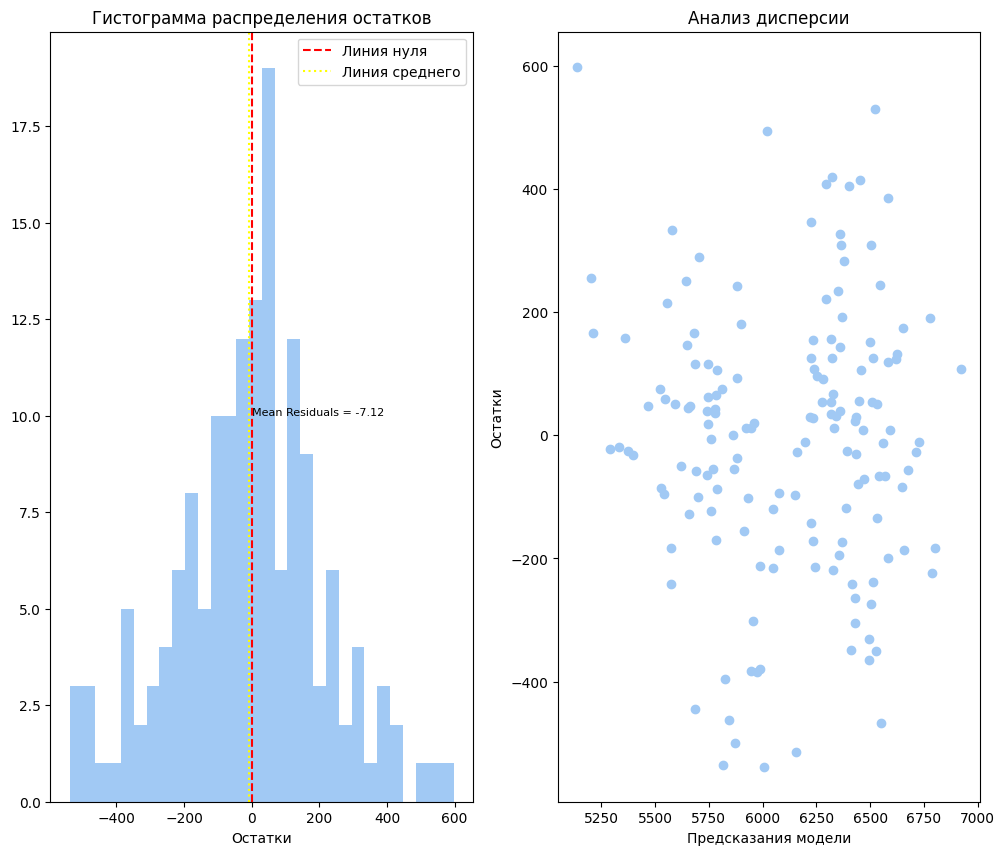

In [83]:
get_quality_and_metrics_of_model(predictions=predictions, y_test=y_test)

- Значение r2 = 0.70 говорит о том, что модель показывает себя хорошо в 70% процентах случаев.
- Анализ остатков показывает, что среднее значение смещено влево от нуля, и говорит о том, что модель дает большие предсказания , её прогнозы больше истинных значений 

## Вторая модель линейной регрессии

Построим модель линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком.


1) Графики показывают, что СПО и Удой связаны нелинейно. Исключите нелинейность: переведите СПО в категориальный признак, выявив и использовав границу нелинейности.
2) Сырой протеин и Удой  также связаны нелинейно. Исключите нелинейность: введите новую признак «Сырой протеин в квадрате»

Для столбца СПО определим границу нелинейности на уровне 0.91, если СПО < 0.91 => низкое спо, и если СПО >= 0.91 => высокое спо в корме.\
Признак Сырой протеин возведем в квадрат , чтобы исключить нелинейность и создадим для этого новый признак Сырой протеин в квадрате

In [84]:
ferma_df_second_model = ferma_df.copy(deep=True)

In [85]:
ferma_df_second_model.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [86]:
ferma_df

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...
625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,Буйный
626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,Барин
627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин


In [87]:
def categorize_spo(row):
    spo = row['СПО (Сахаро-протеиновое соотношение)']
    
    if spo < 0.91:
        return 'низкое спо'
    if spo >= 0.91:
        return 'высокое спо'    
ferma_df_second_model['СПО (Сахаро-протеиновое соотношение)'] = ferma_df_second_model.apply(categorize_spo,axis=1)

In [88]:
ferma_df_second_model.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,низкое спо,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,низкое спо,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,низкое спо,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,низкое спо,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,низкое спо,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [89]:
ferma_df_second_model['Сырой протеин, г ^ 2'] = np.power(ferma_df_second_model['Сырой протеин, г'],2)

In [90]:
ferma_df_second_model.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы,"Сырой протеин, г ^ 2"
id,,,,,,,,,,,,,
1,5863,14.2,1743,низкое спо,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,3038049
2,5529,12.8,2138,низкое спо,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,4571044
3,5810,14.0,1854,низкое спо,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,3437316
4,5895,12.4,2012,низкое спо,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,4048144
5,5302,12.8,1675,низкое спо,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,2805625


In [91]:
input_features = ['ЭКЕ (Энергетическая кормовая единица)', 
                  'Сырой протеин, г ^ 2', 
                  'СПО (Сахаро-протеиновое соотношение)', 
                  'Порода', 
                  'Тип пастбища', 
                  'порода папы_быка'
                  ]

RANDOM_STATE = 42


X = ferma_df_second_model[input_features]
y = ferma_df_second_model['Удой, кг']


X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    random_state=RANDOM_STATE)


cat_col_names = ['Порода', 'Тип пастбища', 'порода папы_быка','СПО (Сахаро-протеиновое соотношение)']
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г ^ 2']

# Создаем экземпляр класса StandardScaler
scaler = StandardScaler()

#  обучаем и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# транформируем количественные признаки на тестовой выборке, 
#метод fit не используем так как уже имеем параметры scaler обученные на тренировочной выборке
X_test_scaled = scaler.transform(X_test[num_col_names])
                        

# создадим переменную с экземпляром класса OneHotEncoder()
# включаем параметр для избегания появления дамми-ошибок,
# отключаем sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# Обучаем и трансформируем тренировочную выборку
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# трансформируем тестовую выборку на даннных обученных в тренировочной выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])


# Создадим датасеты из отмасштабированных и закодированных данных

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names(cat_col_names))
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names(cat_col_names))

# Объединим закодированные и отмасштабированные датасеты

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

lr_model_2 = LinearRegression()
lr_model_2.fit(X_train, y_train)
predictions = lr_model_2.predict(X_test)

Метрика R2: 0.77
MAE = 158
MSE = 39334
RMSE = 198


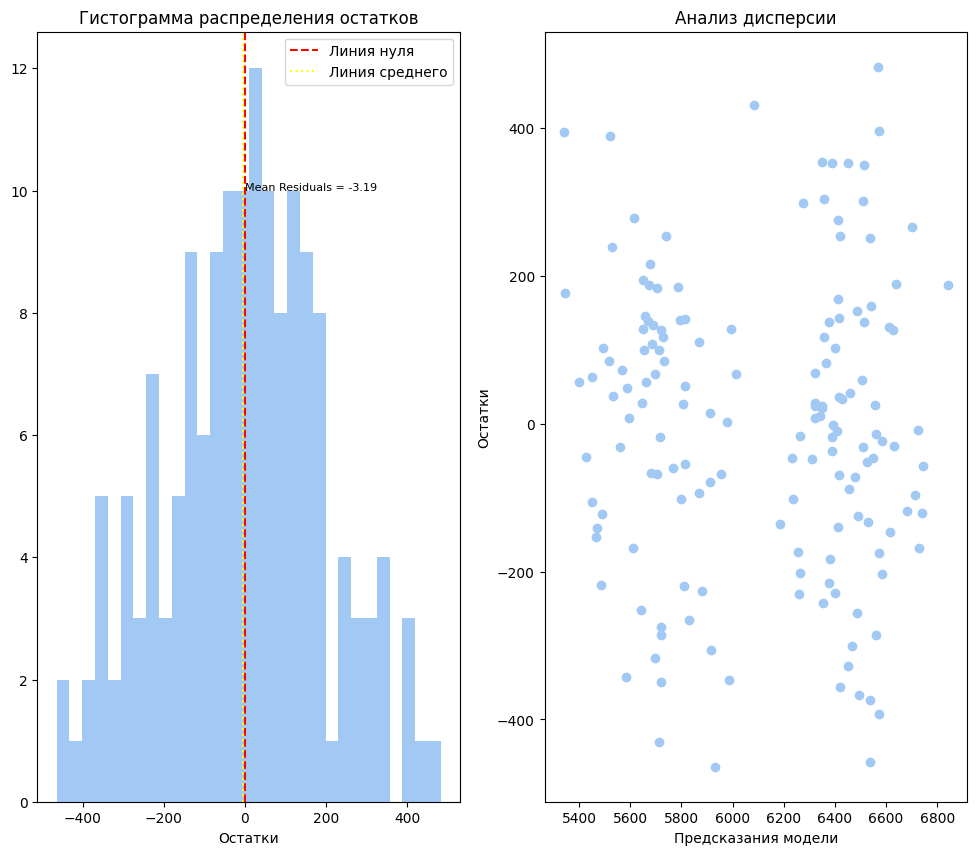

In [92]:
get_quality_and_metrics_of_model(predictions=predictions, y_test=y_test)

Метрика R2 = 0.77, говорит о том, что модель работает успешно в почти в 77% случаев, Анализ остатков показывает, что среднее значение смещено влево от нуля на -3.19, и говорит о том, что модель дает слегка большие предсказания , её прогнозы больше истинных значений.\

Но стоить отметить, что точность оценки этой модели выше, чем у первой модели!

## Третья модель линейной регрессии

Теперь построим модель линейной регрессии с учётом нового признака из файла ferma_dad.csv, учитывая преобразование нелинейности в предыдущей модели.

In [93]:
input_features = ['ЭКЕ (Энергетическая кормовая единица)', 
                  'Сырой протеин, г ^ 2', 
                  'СПО (Сахаро-протеиновое соотношение)', 
                  'Порода', 
                  'Тип пастбища', 
                  'порода папы_быка', 
                  'Имя Папы'
                 ]

RANDOM_STATE = 42


X = ferma_df_second_model[input_features]
y = ferma_df_second_model['Удой, кг']

X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    random_state=RANDOM_STATE)


cat_col_names = ['Порода', 'Тип пастбища', 'порода папы_быка','СПО (Сахаро-протеиновое соотношение)', 'Имя Папы']
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)','Сырой протеин, г ^ 2']

# Создаем экземпляр класса StandardScaler
scaler = StandardScaler()

#  обучаем и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# транформируем количественные признаки на тестовой выборке, 
#метод fit не используем так как уже имеем параметры scaler обученные на тренировочной выборке
X_test_scaled = scaler.transform(X_test[num_col_names])
                        

# создадим переменную с экземпляром класса OneHotEncoder()
# включаем параметр для избегания появления дамми-ошибок,
# отключаем sparse-отображение
encoder = OneHotEncoder(drop='first', sparse=False)

# Обучаем и трансформируем тренировочную выборку
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])

# трансформируем тестовую выборку на даннных обученных в тренировочной выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])

#Создадим датасеты из отмасштабированных и закодированных данных

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder.get_feature_names(cat_col_names))
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names(cat_col_names))

# Объединим закодированные и отмасштабированные датасеты

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


lr_model_3 = LinearRegression()
lr_model_3.fit(X_train, y_train)
predictions = lr_model_3.predict(X_test)

Метрика R2: 0.80
MAE = 150
MSE = 34889
RMSE = 187


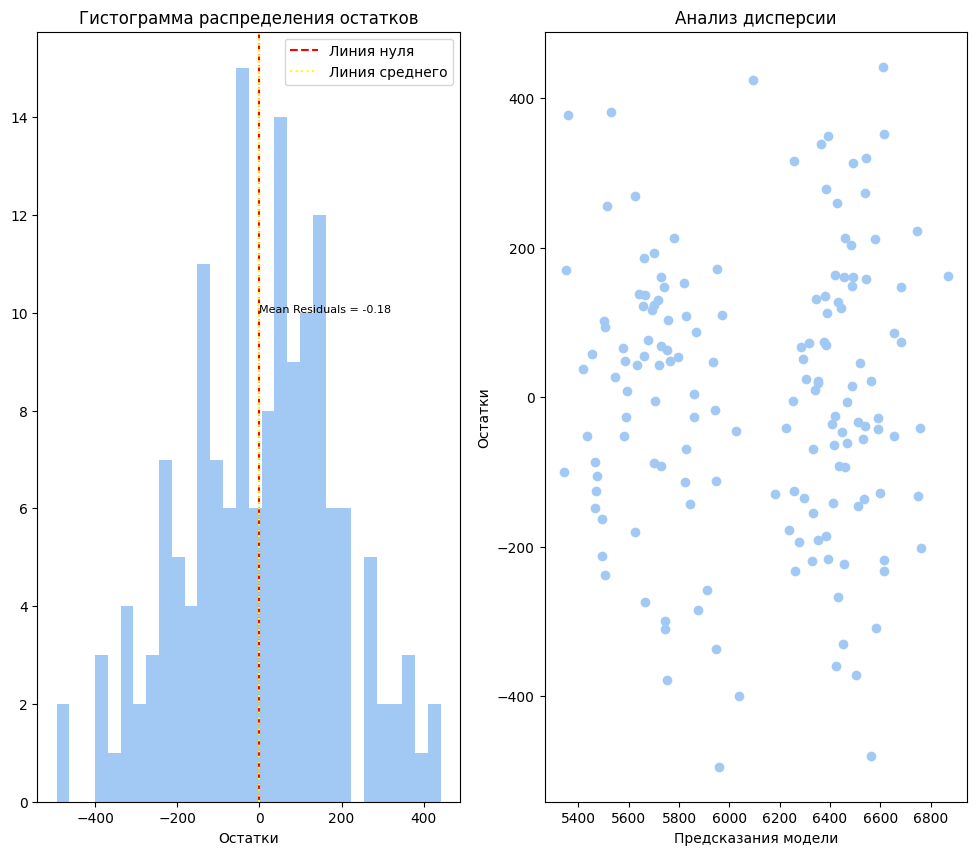

In [94]:
get_quality_and_metrics_of_model(predictions=predictions, y_test=y_test)

Метрика R2 = 0.80, говорит о том, что модель работает успешно в почти в 80% случаев, Анализ остатков показывает, что среднее значение смещено влево от нуля на -0.18, и говорит о том, что модель дает слегка большие предсказания , её прогнозы больше истинных значений.\
Значение MAE говорит о том, что модель в среднем ошибается на 150 кг при прогнозировании Удоя коровы.


Третья модель предсказывает лучше, чем первые две, поэтому эту модель будем использовать для предсказания данных из датасета cow_buy_df.


**Доверительный интервал:**

In [95]:
sample_mean = predictions.mean()
sample_std = predictions.std()

confidence_level = 0.95

z = stats.norm.ppf((1 + confidence_level) / 2)

n = len(predictions)
standard_error = sample_std / np.sqrt(n)

margin_of_error = z * standard_error
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f'Доверительный интервал {int(confidence_level * 100)}%: {confidence_interval}')

Доверительный интервал 95%: (6042.598674798871, 6172.383058270839)


## Применим модель lr_model_3

Применим лучшую по качеству и по точности модель к данным из датасета cow_buy.csv и спрогнозируем удой коров, которых фермер хочет купить.

In [96]:
cow_buy_df.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы
0,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес
1,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,Буйный
2,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,Барин
3,15.26,2017.01,0.96,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,Буйный
4,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,Буйный


In [97]:
cow_buy_df_lr = cow_buy_df.drop(columns=['Жирность,%','Белок,%'])



In [98]:
num_col_names = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)']
cat_col_names = ['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя Папы']

scaler = StandardScaler()
cow_buy_df_lr_scaled = scaler.fit_transform(cow_buy_df_lr[num_col_names])

encoder = OneHotEncoder(drop='first', sparse=False)
cow_buy_df_lr_ohe = encoder.fit_transform(cow_buy_df_lr[cat_col_names])

cow_buy_df_lr_scaled = pd.DataFrame(cow_buy_df_lr_scaled,columns=num_col_names)
cow_buy_df_lr_ohe = pd.DataFrame(cow_buy_df_lr_ohe, columns=encoder.get_feature_names(cat_col_names))

cow_buy_df_lr = pd.concat([cow_buy_df_lr_scaled, cow_buy_df_lr_ohe], axis=1)
cow_buy_df_lr.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода_РефлешнСоверинг,Тип пастбища_Холмистое,порода папы_быка_Соверин,Имя Папы_Буйный,Имя Папы_Геркулес,Имя Папы_Соловчик
0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,-1.0,-1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [99]:
predict_udoi = pd.Series(lr_model_3.predict(cow_buy_df_lr))
predict_udoi

0     6507.436379
1     6373.622924
2     5943.730541
3     5946.586974
4     5664.305233
5     6122.590745
6     6507.436379
7     6373.622924
8     5943.730541
9     5946.586974
10    6681.526743
11    6122.590745
12    6507.436379
13    6631.953075
14    5943.730541
15    5946.586974
16    6681.526743
17    6122.590745
18    6373.622924
19    5664.305233
dtype: float64

Получили прогноз удой для коров, которые рассматриваются к покупке.

<span style="color:black;font-weight:700;font-size:16px"> 
             Вывод
</span>

На данном этапе работы было обучено три модели линейной регрессии.

1) В первом случаае обучили модель линейной регрессии, в качестве целевого признака используем "Удой, кг", в качестве входных признаков возьмем из числовых СПО(Сахарно-протеиновое соотношение) и Сырой протеин, г и ЭКЕ (Энергетическая кормовая единица). Из категориальных признаков возьмем те, которые связаны с физиологией быка - Порода, Тип Пастбища, порода папы_быка.

**Метрики для 1-ой модели** 
- Метрика R2: 0.70
- MAE = 167
- MSE = 47834
- RMSE = 219

Значение r2 = 0.70 говорит о том, что модель показывает себя хорошо в 70% процентах случаев.
Анализ остатков показывает, что среднее значение смещено влево от нуля, и говорит о том, что модель дает большие предсказания  её прогнозы больше истинных значений 

2) Построим модель линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком.\

   Графики показывают, что СПО и Удой связаны нелинейно. Исключили нелинейность: переведите СПО в категориальный признак,выявив и использовав границу нелинейности.
   
   Сырой протеин и Удой также связаны нелинейно. Исключили нелинейность: ввели новый признак «Сырой протеин в квадрате».
   
   Для столбца СПО определим границу нелинейности на уровне 0.91, если СПО < 0.91 => низкое спо, и если СПО >= 0.91 => высокое спо в корме. 
   Признак Сырой протеин возвели в квадрат , чтобы исключить нелинейность и создали для этого новый признак Сырой протеин в квадрате. 
   В результате обучения модели получили следующие метрики:

**Метрики для 2-ой модели** 
- Метрика R2: 0.77
- MAE = 158
- MSE = 39334
- RMSE = 198

Метрика R2 = 0.77, говорит о том, что модель работает успешно в почти в 77% случаев, Анализ остатков показывает, что среднее значение смещено влево от нуля на -3.19, и говорит о том, что модель дает слегка большие предсказания , её прогнозы больше истинных значений.\

Но стоить отметить, что точность оценки этой модели выше, чем у первой модели!


3) Для третьего случая построили модель линейной регрессии с учётом нового признака из файла ferma_dad.csv(Имя Папы), учитывая преобразование нелинейности в второй модели.

**Метрики для 3-ей модели** 
- Метрика R2: 0.80
- MAE = 150
- MSE = 34889
- RMSE = 187

Метрика R2 = 0.80, говорит о том, что модель работает успешно в почти в 80% случаев, Анализ остатков показывает, что среднее значение смещено влево от нуля на -0.18, и говорит о том, что модель дает слегка большие предсказания , её прогнозы больше истинных значений.
Значение MAE говорит о том, что модель в среднем ошибается на 150 кг при прогнозировании Удоя коровы.

Третья модель показала лучшее качество по метрикам, поэтому эту модель использовали для предсказания данных из датасета cow_buy_df для прогнозирования Удой коровы.



# Обучение модели логистической регрессии

В качестве входных признаков используем **Параметры корма коровы**\
ЭКЕ (Энергетическая кормовая единица) — измерение питательности корма коровы;\
Сырой протеин — содержание сырого протеина в корме, в граммах;\
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.\
Где паслась корова - Тип пастбища\
И физилогические характеристики - Порода, порода папы_быка и имя папы Быка
И параметра самого молока - Жирность,% и Белок,%


В качестве целевого признака используем признак **Вкус молока**.

In [100]:
ferma_df.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст,Имя Папы
id,,,,,,,,,,,,
1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный
2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик
3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин
4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный
5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин


In [101]:
cow_buy_df.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы
0,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес
1,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,Буйный
2,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,Барин
3,15.26,2017.01,0.96,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,Буйный
4,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,Буйный


In [102]:
input_features_log_reg = ['ЭКЕ (Энергетическая кормовая единица)', 
                  'Сырой протеин, г', 
                  'СПО (Сахаро-протеиновое соотношение)', 
                  'Порода', 
                  'Тип пастбища', 
                  'порода папы_быка', 
                  'Жирность,%',
                  'Белок,%',
                  'Имя Папы',
                   'Возраст',
                  'Вкус молока'
                 ]


ferma_df_log_reg = ferma_df[input_features_log_reg]

ferma_df_log_reg.head()
X = ferma_df_log_reg.drop(columns=['Вкус молока'])
y = ferma_df_log_reg['Вкус молока']

RANDOM_STATE = 42
y = y.map({'вкусно': 1, 'не вкусно': 0})

X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    random_state=RANDOM_STATE)

X.head()

num_col_names_log_reg = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
                         'СПО (Сахаро-протеиновое соотношение)', 'Жирность,%', 'Белок,%']
cat_col_names_log_reg = ['Порода','Тип пастбища', 'порода папы_быка', 'Возраст','Имя Папы']

# Отмасштабируем числовые признаки
log_reg_scaler = StandardScaler()
X_train_log_reg_scaled = log_reg_scaler.fit_transform(X_train[num_col_names_log_reg])
X_test_log_reg_scaled = log_reg_scaler.transform(X_test[num_col_names_log_reg])

# Кодируем категориальные признаки
log_reg_encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_log_reg = log_reg_encoder.fit_transform(X_train[cat_col_names_log_reg])
X_test_ohe_log_reg = log_reg_encoder.transform(X_test[cat_col_names_log_reg])

X_train_log_reg_scaled = pd.DataFrame(X_train_log_reg_scaled, columns=num_col_names_log_reg)
X_test_log_reg_scaled = pd.DataFrame(X_test_log_reg_scaled, columns=num_col_names_log_reg)

X_train_ohe_log_reg = pd.DataFrame(X_train_ohe_log_reg, columns=log_reg_encoder.get_feature_names(cat_col_names_log_reg))
X_test_ohe_log_reg = pd.DataFrame(X_test_ohe_log_reg, columns=log_reg_encoder.get_feature_names(cat_col_names_log_reg))

X_train = pd.concat([X_train_log_reg_scaled, X_train_ohe_log_reg], axis=1)
X_test = pd.concat([X_test_log_reg_scaled, X_test_ohe_log_reg], axis=1)

X_train.head()


log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)

y_pred = log_reg_model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Точность модели: {round(acc * 100)} %")

Точность модели: 51 %


In [103]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'precision: {round(precision,2)}')
print(f'recall: {round(recall, 2)}')

precision: 0.55
recall: 0.69


<Axes: >

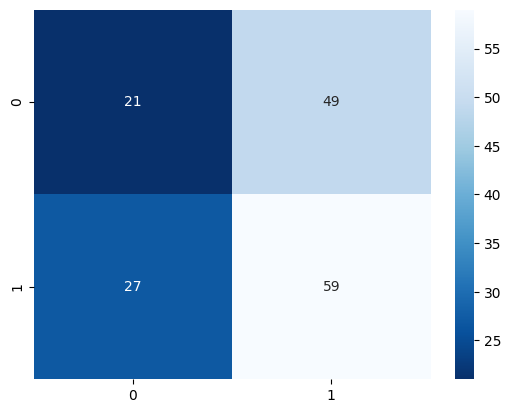

In [104]:
conf_matr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matr, annot=True,  cmap='Blues_r')

У модели логистической регрессии получились следующие метрики:

accuracy = 52 %\
precision: 0.55\
recall: 0.69

Качество модели получилось не самым высоким.

При покупке коров нам важнее всего увеличивать метрику recall. Чем выше recall, тем больше прогнозов Positive модель смогла дать верно. В случае со вкусом молока это означает, то что модель будет точнее определеять вкусное молоко и фермер сможет на этом больше заработать. Теперь мы можем подобрать порог, для которого метрика recall будет = 1.

Теперь рассчитайте метрики для случая, когда критическая ошибка будет равна 0. Для этого нужно изменить вероятность принадлежности к положительному или отрицательному классу. Какой уровень этой вероятности?

In [105]:
y_proba = log_reg_model.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

data.head() 


,y_valid,y_proba
113,1,0.920355
105,1,0.889032
141,0,0.875452
27,1,0.851245
142,1,0.850804


In [106]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 15,endpoint=False)]
print(thresholds) 

[0.1, 0.16, 0.22, 0.28, 0.34, 0.4, 0.46, 0.52, 0.58, 0.64, 0.7, 0.76, 0.82, 0.88, 0.94]


In [107]:
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x > i else 0 )
    
    
data.sample(5)

,y_valid,y_proba,y_pred_0.1,y_pred_0.16,y_pred_0.22,y_pred_0.28,y_pred_0.34,y_pred_0.4,y_pred_0.46,y_pred_0.52,y_pred_0.58,y_pred_0.64,y_pred_0.7,y_pred_0.76,y_pred_0.82,y_pred_0.88,y_pred_0.94
119,0,0.282107,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.422828,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
125,0,0.485218,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
128,1,0.460840,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
134,0,0.522209,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0


In [108]:
# Создайте список для хранения результатов recall для каждого порога
recall_scores = []

# Рассчитайте recall для каждого порога
for threshold in thresholds:
    threshold_col = 'y_pred_' + str(threshold)
    threshold_value = float(threshold_col.split('_')[-1])
    y_pred = data[threshold_col]
    recall_value = recall_score(data['y_valid'], y_pred)  
    recall_scores.append((threshold_col, recall_value))

# Выведите результаты
for threshold_col, recall_value in recall_scores:
    print(f"{threshold_col}: Recall = {recall_value}")


y_pred_0.1: Recall = 1.0
y_pred_0.16: Recall = 1.0
y_pred_0.22: Recall = 0.9883720930232558
y_pred_0.28: Recall = 0.9767441860465116
y_pred_0.34: Recall = 0.9302325581395349
y_pred_0.4: Recall = 0.8953488372093024
y_pred_0.46: Recall = 0.7674418604651163
y_pred_0.52: Recall = 0.6744186046511628
y_pred_0.58: Recall = 0.5581395348837209
y_pred_0.64: Recall = 0.43023255813953487
y_pred_0.7: Recall = 0.3372093023255814
y_pred_0.76: Recall = 0.29069767441860467
y_pred_0.82: Recall = 0.13953488372093023
y_pred_0.88: Recall = 0.023255813953488372
y_pred_0.94: Recall = 0.0


При пороге пороге выше 0.84 нам удастя прогнозировать коров только с вкусным молоком, так как FN - ложноотрицательная ошибка при таком пороге = 0, соответсвенно при recall=1 модель классификации log_reg_model присвоить класс 1 всем объектам этого класса. 

## Применим обученную модель на cow_buy_df

In [109]:
cow_buy_df_log_reg = cow_buy_df.copy()
cow_buy_df_log_reg.head()


,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы
0,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес
1,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,Буйный
2,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,Барин
3,15.26,2017.01,0.96,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,Буйный
4,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,Буйный


In [110]:
num_col_names_2 = ['ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г', 
                 'СПО (Сахаро-протеиновое соотношение)','Жирность,%','Белок,%']

cat_col_names_2 = ['Порода', 'Тип пастбища', 'порода папы_быка','Возраст', 'Имя Папы']

scaler = StandardScaler()
cow_buy_df_log_reg_scaled = scaler.fit_transform(cow_buy_df_log_reg[num_col_names_2])

encoder = OneHotEncoder(drop='first', sparse=False)
cow_buy_df_log_reg_ohe = encoder.fit_transform(cow_buy_df_log_reg[cat_col_names_2])

cow_buy_df_log_reg_scaled = pd.DataFrame(cow_buy_df_log_reg_scaled,columns=num_col_names_2)
cow_buy_df_log_reg_ohe = pd.DataFrame(cow_buy_df_log_reg_ohe, columns=encoder.get_feature_names(cat_col_names_2))

cow_buy_df_log_reg = pd.concat([cow_buy_df_log_reg_scaled, cow_buy_df_log_reg_ohe], axis=1)
cow_buy_df_log_reg.head()

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%",Порода_РефлешнСоверинг,Тип пастбища_Холмистое,порода папы_быка_Соверин,Возраст_менее_2_лет,Имя Папы_Буйный,Имя Папы_Геркулес,Имя Папы_Соловчик
0,0.0,-1.0,-1.0,0.020225,0.645020,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,-1.0,-1.0,-0.303380,1.141190,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,-1.0,-1.0,0.101127,0.446553,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,-1.0,-1.0,-1.436000,-0.843488,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,-1.0,-1.0,0.505634,0.446553,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
predict_vkus = pd.Series(log_reg_model.predict(cow_buy_df_log_reg))
predict_vkus

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    0
15    1
16    1
17    0
18    1
19    0
dtype: int64

In [112]:
predict_vkus = predict_vkus.map({1:'вкусно',0 : 'не вкусно'})
predict_vkus

0        вкусно
1     не вкусно
2     не вкусно
3        вкусно
4     не вкусно
5     не вкусно
6        вкусно
7     не вкусно
8     не вкусно
9        вкусно
10    не вкусно
11    не вкусно
12    не вкусно
13       вкусно
14    не вкусно
15       вкусно
16       вкусно
17    не вкусно
18       вкусно
19    не вкусно
dtype: object

In [113]:
cow_buy_df['Удой, кг'] = predict_udoi
cow_buy_df.insert(loc=11, column='Вкус молока', value=predict_vkus)

In [114]:
cow_buy_df

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы,"Удой, кг",Вкус молока
0,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес,6507.436379,вкусно
1,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.081,менее_2_лет,Буйный,6373.622924,не вкусно
2,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,Барин,5943.730541,не вкусно
3,15.26,2017.01,0.96,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.061,более_2_лет,Буйный,5946.586974,вкусно
4,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Айдиал,3.64,3.074,более_2_лет,Буйный,5664.305233,не вкусно
5,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Соверин,3.63,3.053,менее_2_лет,Геркулес,6122.590745,не вкусно
6,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес,6507.436379,вкусно
7,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.57,3.079,более_2_лет,Буйный,6373.622924,не вкусно
8,15.26,2017.01,0.96,РефлешнСоверинг,Равнинное,Соверин,3.59,3.074,более_2_лет,Барин,5943.730541,не вкусно
9,15.26,2017.01,0.96,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.079,менее_2_лет,Буйный,5946.586974,вкусно


Выведем тех коров, которые по требованию заказчика будут иметь больше 6000 кг удоя и иметь вкусное молоко. 

In [115]:
cow_to_buy = cow_buy_df[(cow_buy_df['Вкус молока']== 'вкусно') & (cow_buy_df['Удой, кг'] >= 6000)]
cow_to_buy

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы,"Удой, кг",Вкус молока
0,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес,6507.436379,вкусно
6,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес,6507.436379,вкусно
13,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Соверин,3.42,3.075,менее_2_лет,Барин,6631.953075,вкусно
16,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Соверин,3.73,3.079,более_2_лет,Соловчик,6681.526743,вкусно
18,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.34,3.069,более_2_лет,Буйный,6373.622924,вкусно


Вот эти пять коров стоит купить так как они удовлетворют его условиям.

Как можно заметить, в этом списке присутсвуют коровы только породы Вис Бик Айдиал, также почти все коровы пасутся на Холмистом пастбище и возраста больше 2 лет.

Именно на этим критериям фермеру стоит уделить особое внимаение при покупке коров к себе в молочное хозяйство


<span style="color:black;font-weight:700;font-size:22px"> 
             Общий вывод
</span>

К Нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих бурёнок!\
Поэтому он просит нас модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье.

Для работы было предоставлено три датасета

Датасет ferma_df из файла ferma_main.csv(Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. ) содержит 634 записи и 12 признаков. В данном датасет отсутсвуют пропуски в данных, но для некоторых признаков необходимо преобразовать типы данных.

Датасет ferma_dad_df из файла ferma_dad.csv (Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера.)содержит в себе 629 записей и 2 признака. В данном датасет отсутсвуют пропуски в данных, но для некоторых признаков необходимо преобразовать типы данных.

Датасет cow_buy_df (Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Структура таблицы почти аналогична ferma_main.csv, кроме нескольких особенностей:)содержит в себе 20 записей и 6 признаков.В данном датасет отсутсвуют пропуски в данных, но для некоторых признаков необходимо преобразовать типы данных.

**В ходе предобработки данных** были обработаны три датасета ferma_df, ferma_dad_df, cow_buy_df.

В датасете ferma_df были преобразованы типы числовых столбцов с типа object на float, отфильтрованы аномальные значения столбца "Удой, кг", а также обработаны дубликаты в строках.

Датасет ferma_dad_df не требовал обработки так как не содержит дубликатов, выбросов и аномалий.

В датасете cow_buy_df были преобразованы типы числовых столбцов с типа object на float, а также обработаны дубликаты в строках.

Также были типизированы данные для датасетов ferma_df и cow_buy_df для удобвства построения моделей МО.

**Исследовательский анализ**: показал
- Признак Удой, кг распределен в пределах [5204, 7141], данные распрделены по нормальноему закону.Соеднее значение - 6115.64.
- Признак ЭКЕ() Энергетическая кормовая единица распределен в пределах [10.9, 16.8], данные распределены примерно по нормальному закону со средним значением - 14.53.
- Признак Сырой протеин распределен в пределах [1660, 2349],  данные распределены примерно по нормальному закону со средним значением - 1920.9630
- Признак СПО имеет среднее значение - 0.912781

- Признак Жирность,% распределен в пределах [3.07, 3.75]. Значение в пределах 3.7% самые популярные, среднее значение столбца- 3.603215
- Признак Белок,% имеет среднее значение - 3.075677

- Порода Вис Бик Айдиал встречается в 59,5% случаев, РефлешнСоверинг - 40,5%.
- Как можно заметить чаще коровы пасутся на холмистых пастбищах - 344, на равнине реже - 278.
- Породы отцов быков, распрелелены одинаково по выборке.
- В 58.5% случаях молоко является вкусным, в 41.5% - нет.
- На ферме 82.3% коров старше 2 лет, 17.7% - нет.
- Самый распространненый отец у поголовья коров на ферме - Барин(38.6%), далее идут Буйный(33.6%), Соловчик(38.6%) и самый редкий случай - Геркулес(10.1%)


Как можно заметить Удой как правило выше у коров, чей возраст больше 2 лет. В целом большой разницы в удое коровы разных пород не наблюдается. Также можно сказать породы имеет почти одинаковое соотношение вкусного/ невкусного молока и то, что коровы которые пасутся на холмистой местности имеет больший процент вкусного молока, чем на равнине.

**Корреляционный анализ** показал
:
Как можно заметить, целевой признак Удой, кг имеет высокую положительную коррелляцию со следующими признаками:

'СПО (Сахаро-протеиновое соотношение)' - 0.79
'Жирность,%' - 0.69
'ЭКЕ (Энергетическая кормовая единица)' - 0.76
'Сырой протеин, г' - 0.43

Между данными признаками и целевым признаком наблюдаются сильная линейная зависимость, и их можно учитывать для построения модели линейной регрессии, но так как нецелесообразно предсказывать удой коровы по параметрам молока, поэтому для модели регрессии будем использовать параметры корма, среди которых-  'ЭКЕ (Энергетическая кормовая единица)', 'Сырой протеин, г','СПО (Сахаро-протеиновое соотношение)', но так как ЭКЕ И СПО имеют между собой высокий коэффициент корреляции и дабы избежать мультиколлинеарности уберем признак СПО 


**Обучение модели линейной регрессии**
На данном этапе работы было обучено три модели линейной регрессии.

1) В первом случаае обучили модель линейной регрессии, в качестве целевого признака используем "Удой, кг", в качестве входных признаков возьмем из числовых СПО(Сахарно-протеиновое соотношение) и Сырой протеин, г и ЭКЕ (Энергетическая кормовая единица). Из категориальных признаков возьмем те, которые связаны с физиологией быка - Порода, Тип Пастбища, порода папы_быка.

**Метрики для 1-ой модели** 
- Метрика R2: 0.70
- MAE = 167
- MSE = 47834
- RMSE = 219

Значение r2 = 0.70 говорит о том, что модель показывает себя хорошо в 70% процентах случаев.
Анализ остатков показывает, что среднее значение смещено влево от нуля, и говорит о том, что модель дает большие предсказания  её прогнозы больше истинных значений 

2) Построим модель линейной регрессии с учётом преобразования признаков, нелинейно связанных с целевым признаком.\

   Графики показывают, что СПО и Удой связаны нелинейно. Исключили нелинейность: переведите СПО в категориальный признак,выявив и использовав границу нелинейности.
   
   Сырой протеин и Удой также связаны нелинейно. Исключили нелинейность: ввели новый признак «Сырой протеин в квадрате».
   
   Для столбца СПО определим границу нелинейности на уровне 0.91, если СПО < 0.91 => низкое спо, и если СПО >= 0.91 => высокое спо в корме. 
   Признак Сырой протеин возвели в квадрат , чтобы исключить нелинейность и создали для этого новый признак Сырой протеин в квадрате. 
   В результате обучения модели получили следующие метрики:

**Метрики для 2-ой модели** 
- Метрика R2: 0.77
- MAE = 158
- MSE = 39334
- RMSE = 198

Метрика R2 = 0.77, говорит о том, что модель работает успешно в почти в 77% случаев, Анализ остатков показывает, что среднее значение смещено влево от нуля на -3.19, и говорит о том, что модель дает слегка большие предсказания , её прогнозы больше истинных значений.\

Но стоить отметить, что точность оценки этой модели выше, чем у первой модели!


3) Для третьего случая построили модель линейной регрессии с учётом нового признака из файла ferma_dad.csv(Имя Папы), учитывая преобразование нелинейности в второй модели.

**Метрики для 3-ей модели** 
- Метрика R2: 0.80
- MAE = 150
- MSE = 34889
- RMSE = 187

Метрика R2 = 0.80, говорит о том, что модель работает успешно в почти в 80% случаев, Анализ остатков показывает, что среднее значение смещено влево от нуля на -0.18, и говорит о том, что модель дает слегка большие предсказания , её прогнозы больше истинных значений.
Значение MAE говорит о том, что модель в среднем ошибается на 150 кг при прогнозировании Удоя коровы.

Третья модель показала лучшее качество по метрикам, поэтому эту модель использовали для предсказания данных из датасета cow_buy_df для прогнозирования Удой коровы.

**Обучение модели логистической регрессии** 

В качестве входных признаков используем Параметры корма коровы
ЭКЕ (Энергетическая кормовая единица) — измерение питательности корма коровы;
Сырой протеин — содержание сырого протеина в корме, в граммах;
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
Где паслась корова - Тип пастбища
И физилогические характеристики - Порода, порода папы_быка и имя папы Быка И параметра самого молока - Жирность,% и Белок,%

В качестве целевого признака используем признак Вкус молока.

У модели логистической регрессии получились следующие метрики:

accuracy = 52 %\
precision: 0.55\
recall: 0.69

Качество модели получилось не самым высоким.

При покупке коров нам важнее всего увеличивать метрику recall. Чем выше recall, тем больше прогнозов Positive модель смогла дать верно. В случае со вкусом молока это означает, то что модель будет точнее определеять вкусное молоко и фермер сможет на этом больше заработать. Теперь мы можем подобрать порог, для которого метрика recall будет = 1.

При пороге пороге выше 0.84 нам удастя прогнозировать коров только с вкусным молоком, так как FN - ложноотрицательная ошибка при таком пороге = 0, соответсвенно при recall=1 модель классификации log_reg_model присвоить класс 1 всем объектам этого класса, соответственно мы можем максимизировать вероятноть определения  всех коров с вкусным молоком.

Обученные модели были применены для прогногзирования Удоя и вкуса молока, для коров ,которых фермер рассматривает для покупуки.
Модели показали следующие результаты:

In [116]:
cow_to_buy

,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Возраст,Имя Папы,"Удой, кг",Вкус молока
0,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес,6507.436379,вкусно
6,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Айдиал,3.58,3.076,более_2_лет,Геркулес,6507.436379,вкусно
13,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Соверин,3.42,3.075,менее_2_лет,Барин,6631.953075,вкусно
16,15.26,2017.01,0.96,Вис Бик Айдиал,Холмистое,Соверин,3.73,3.079,более_2_лет,Соловчик,6681.526743,вкусно
18,15.26,2017.01,0.96,Вис Бик Айдиал,Равнинное,Соверин,3.34,3.069,более_2_лет,Буйный,6373.622924,вкусно


Вот эти пять коров стоит купить так как они удовлетворют его условиям.

Как можно заметить, в этом списке присутсвуют коровы только породы Вис Бик Айдиал, также почти все коровы пасутся на Холмистом пастбище и возраста больше 2 лет.

Именно на этим критериям фермеру стоит уделить особое внимаение при покупке коров к себе в молочное хозяйство

Также для получения более точных прогнозов фермеру предлагается рассматривать другие критерии которые могут влиять на удой, например, Уход и условия содержания, Здоровье, Лактационный цикл.

для предсказания вкуса молока можно добавить следующие критерии: Запах окружающей среды, Обработка и хранение молока,Срок сдачи молока и другие.